# Лабораторная работа 4: Очистка данных и выбор признаков

Анализ датасета healthy_meal_plans.csv, очистка от выбросов и формирование набора признаков с целевой переменной.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Загрузка данных
df = pd.read_csv('healthy_meal_plans.csv')

print("Информация о датасете:")
print(f"Размер: {df.shape}")
print(f"\nСтолбцы:")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")
    
print(f"\nПервые 5 строк:")
df.head()


Информация о датасете:
Размер: (500, 14)

Столбцы:
 1. meal_name
 2. num_ingredients
 3. calories
 4. prep_time
 5. protein
 6. fat
 7. carbs
 8. vegan
 9. vegetarian
10. keto
11. paleo
12. gluten_free
13. mediterranean
14. is_healthy

Первые 5 строк:


,meal_name,num_ingredients,calories,prep_time,protein,fat,carbs,vegan,vegetarian,keto,paleo,gluten_free,mediterranean,is_healthy
0,Gluten-Free Pasta,0.272727,0.490909,0.84,0.783679,0.597907,0.444572,0,0,0,0,1,0,1
1,Grilled Salmon,0.909091,0.158182,0.70,0.143588,0.652082,0.050609,0,0,1,1,1,1,0
2,Lentil Soup,0.454545,0.700000,0.40,0.620637,0.612748,0.000688,0,1,0,0,0,0,0
3,Chickpea Stew,0.909091,0.105455,0.82,0.046893,0.975761,0.229026,1,1,0,0,0,0,0
4,Turkey Lettuce Wraps,0.181818,0.441818,0.04,0.864340,0.681575,0.449293,0,0,1,1,1,1,0


In [13]:
# Анализ возможных целевых переменных
print("Анализ столбцов для выбора целевой переменной:")
print("\nЧисловые столбцы:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    unique_vals = df[col].nunique()
    print(f"  {col:20}: {unique_vals:3d} уникальных значений")

print("\nКатегориальные столбцы:")
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"  {col:20}: {unique_vals:3d} уникальных значений")
    
# Выбираем is_healthy как целевую переменную (бинарная классификация)
target_column = 'is_healthy'
print(f"\n🎯 Выбрана целевая переменная: {target_column}")
print(f"Распределение классов:")
print(df[target_column].value_counts())
print(f"Пропорции:")
print(df[target_column].value_counts(normalize=True).round(3))


Анализ столбцов для выбора целевой переменной:

Числовые столбцы:
  num_ingredients     :  12 уникальных значений
  calories            : 340 уникальных значений
  prep_time           :  51 уникальных значений
  protein             : 500 уникальных значений
  fat                 : 500 уникальных значений
  carbs               : 500 уникальных значений
  vegan               :   2 уникальных значений
  vegetarian          :   2 уникальных значений
  keto                :   2 уникальных значений
  paleo               :   2 уникальных значений
  gluten_free         :   2 уникальных значений
  mediterranean       :   2 уникальных значений
  is_healthy          :   2 уникальных значений

Категориальные столбцы:
  meal_name           :  20 уникальных значений

🎯 Выбрана целевая переменная: is_healthy
Распределение классов:
is_healthy
0    453
1     47
Name: count, dtype: int64
Пропорции:
is_healthy
0    0.906
1    0.094
Name: proportion, dtype: float64


In [14]:
# Формирование набора признаков
# Исключаем целевую переменную и нечисловые признаки
feature_columns = [col for col in df.columns if col != target_column and col != 'meal_name']

print("📋 Формирование набора признаков:")
print(f"Всего столбцов в датасете: {len(df.columns)}")
print(f"Целевая переменная: {target_column}")
print(f"Исключаем: meal_name (текстовый идентификатор)")
print(f"Количество признаков: {len(feature_columns)}")

print(f"\n🔢 Список признаков:")
for i, col in enumerate(feature_columns, 1):
    col_type = "числовой" if col in numeric_cols else "категориальный"
    print(f"{i:2d}. {col:20} ({col_type})")

# Разделяем на X (признаки) и y (целевая переменная)
X = df[feature_columns]
y = df[target_column]

print(f"\nРазмеры:")
print(f"X (признаки): {X.shape}")
print(f"y (цель): {y.shape}")


📋 Формирование набора признаков:
Всего столбцов в датасете: 14
Целевая переменная: is_healthy
Исключаем: meal_name (текстовый идентификатор)
Количество признаков: 12

🔢 Список признаков:
 1. num_ingredients      (числовой)
 2. calories             (числовой)
 3. prep_time            (числовой)
 4. protein              (числовой)
 5. fat                  (числовой)
 6. carbs                (числовой)
 7. vegan                (числовой)
 8. vegetarian           (числовой)
 9. keto                 (числовой)
10. paleo                (числовой)
11. gluten_free          (числовой)
12. mediterranean        (числовой)

Размеры:
X (признаки): (500, 12)
y (цель): (500,)


In [15]:
# Анализ пропусков и выбросов
print("🔍 Анализ качества данных:")
print("\n1. Пропуски:")
missing_data = X.isnull().sum()
if missing_data.sum() == 0:
    print("   ✅ Пропусков нет")
else:
    print(f"   ❌ Найдено {missing_data.sum()} пропусков")
    print(missing_data[missing_data > 0])

print("\n2. Анализ выбросов (IQR метод):")
numeric_features = X.select_dtypes(include=[np.number]).columns
outliers_info = {}

for col in numeric_features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    outliers_count = len(outliers)
    outliers_info[col] = outliers_count
    
    print(f"   {col:20}: {outliers_count:3d} выбросов ({outliers_count/len(X)*100:.1f}%)")

total_outliers = sum(outliers_info.values())
print(f"\n   Всего выбросов: {total_outliers}")


🔍 Анализ качества данных:

1. Пропуски:
   ✅ Пропусков нет

2. Анализ выбросов (IQR метод):
   num_ingredients     :   0 выбросов (0.0%)
   calories            :   0 выбросов (0.0%)
   prep_time           :   0 выбросов (0.0%)
   protein             :   0 выбросов (0.0%)
   fat                 :   0 выбросов (0.0%)
   carbs               :   0 выбросов (0.0%)
   vegan               :   0 выбросов (0.0%)
   vegetarian          :   0 выбросов (0.0%)
   keto                :   0 выбросов (0.0%)
   paleo               :   0 выбросов (0.0%)
   gluten_free         :   0 выбросов (0.0%)
   mediterranean       :   0 выбросов (0.0%)

   Всего выбросов: 0


In [16]:
# Очистка от выбросов
print("🧹 Очистка данных от выбросов...")

# Создаем маску для строк без выбросов
mask = pd.Series(True, index=X.index)

for col in numeric_features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Обновляем маску - исключаем строки с выбросами в любом столбце
    mask = mask & (X[col] >= lower_bound) & (X[col] <= upper_bound)

# Применяем маску
X_clean = X[mask]
y_clean = y[mask]

print(f"Размер до очистки: {X.shape}")
print(f"Размер после очистки: {X_clean.shape}")
print(f"Удалено строк: {X.shape[0] - X_clean.shape[0]} ({(X.shape[0] - X_clean.shape[0])/X.shape[0]*100:.1f}%)")

# Проверяем распределение классов после очистки
print(f"\nРаспределение классов после очистки:")
print(y_clean.value_counts())
print(f"Пропорции:")
print(y_clean.value_counts(normalize=True).round(3))


🧹 Очистка данных от выбросов...
Размер до очистки: (500, 12)
Размер после очистки: (500, 12)
Удалено строк: 0 (0.0%)

Распределение классов после очистки:
is_healthy
0    453
1     47
Name: count, dtype: int64
Пропорции:
is_healthy
0    0.906
1    0.094
Name: proportion, dtype: float64


In [17]:
# Масштабирование признаков
print("⚖️ Применение масштабирования:")

# Разделяем числовые и категориальные признаки
numeric_clean = X_clean.select_dtypes(include=[np.number])
categorical_clean = X_clean.select_dtypes(exclude=[np.number])

print(f"Числовых признаков: {numeric_clean.shape[1]}")
print(f"Категориальных признаков: {categorical_clean.shape[1]}")

# StandardScaler для числовых признаков
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(
    scaler.fit_transform(numeric_clean),
    columns=numeric_clean.columns,
    index=numeric_clean.index
)

# Объединяем масштабированные числовые и категориальные признаки
if not categorical_clean.empty:
    X_final = pd.concat([numeric_scaled, categorical_clean], axis=1)
else:
    X_final = numeric_scaled

print(f"✅ Итоговый размер данных: {X_final.shape}")
print(f"Целевая переменная: {y_clean.shape}")

# Проверка масштабирования
print(f"\nПроверка масштабирования числовых признаков:")
for col in numeric_scaled.columns[:5]:  # показываем первые 5
    mean_val = numeric_scaled[col].mean()
    std_val = numeric_scaled[col].std()
    print(f"{col:20}: μ={mean_val:6.3f}, σ={std_val:6.3f}")


⚖️ Применение масштабирования:
Числовых признаков: 12
Категориальных признаков: 0
✅ Итоговый размер данных: (500, 12)
Целевая переменная: (500,)

Проверка масштабирования числовых признаков:
num_ingredients     : μ= 0.000, σ= 1.001
calories            : μ= 0.000, σ= 1.001
prep_time           : μ=-0.000, σ= 1.001
protein             : μ=-0.000, σ= 1.001
fat                 : μ= 0.000, σ= 1.001


In [18]:
# Сохранение финальных данных
print("💾 Сохранение обработанных данных...")

# Создаем финальный датасет
final_dataset = X_final.copy()
final_dataset[target_column] = y_clean

# Сохраняем
final_dataset.to_csv('healthy_meal_plans_processed.csv', index=False)

print(f"📁 Сохранен файл: healthy_meal_plans_processed.csv")
print(f"\n📊 Итоговая информация:")
print(f"   • Исходный размер датасета: {df.shape}")
print(f"   • Размер после очистки: {final_dataset.shape}")
print(f"   • Целевая переменная: {target_column}")
print(f"   • Количество признаков: {X_final.shape[1]}")
print(f"   • Числовые признаки: {len(numeric_clean.columns)}")
print(f"   • Категориальные признаки: {len(categorical_clean.columns) if not categorical_clean.empty else 0}")
print(f"   • Удалено строк: {df.shape[0] - final_dataset.shape[0]}")

print(f"\n✅ Данные готовы для машинного обучения!")
print(f"   X_final: признаки {X_final.shape}")
print(f"   y_clean: целевая переменная {y_clean.shape}")


💾 Сохранение обработанных данных...
📁 Сохранен файл: healthy_meal_plans_processed.csv

📊 Итоговая информация:
   • Исходный размер датасета: (500, 14)
   • Размер после очистки: (500, 13)
   • Целевая переменная: is_healthy
   • Количество признаков: 12
   • Числовые признаки: 12
   • Категориальные признаки: 0
   • Удалено строк: 0

✅ Данные готовы для машинного обучения!
   X_final: признаки (500, 12)
   y_clean: целевая переменная (500,)


## Создание моделей бинарной классификации


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_clean, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_clean
)

print("📊 Разделение данных:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Распределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True).round(3))


📊 Разделение данных:
Обучающая выборка: (400, 12)
Тестовая выборка: (100, 12)
Распределение классов в обучающей выборке:
is_healthy
0    0.905
1    0.095
Name: proportion, dtype: float64


In [20]:
# 1. Логистическая регрессия
print("🎯 1. Логистическая регрессия")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f"Точность: {lr_accuracy:.4f}")

# 2. SVM (Support Vector Machine)
print("\n🎯 2. SVM")
svm_model = SVC(random_state=42, kernel='rbf')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"Точность: {svm_accuracy:.4f}")

# 3. CART (Decision Tree)
print("\n🎯 3. CART (Decision Tree)")
cart_model = DecisionTreeClassifier(random_state=42, max_depth=10)
cart_model.fit(X_train, y_train)
cart_predictions = cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, cart_predictions)

print(f"Точность: {cart_accuracy:.4f}")

# Сводная таблица результатов
results = {
    'Модель': ['Логистическая регрессия', 'SVM', 'CART'],
    'Точность': [lr_accuracy, svm_accuracy, cart_accuracy]
}

results_df = pd.DataFrame(results)
print(f"\n📋 Сводная таблица результатов:")
print(results_df)


🎯 1. Логистическая регрессия
Точность: 0.9100

🎯 2. SVM
Точность: 0.9100

🎯 3. CART (Decision Tree)
Точность: 0.9700

📋 Сводная таблица результатов:
                    Модель  Точность
0  Логистическая регрессия      0.91
1                      SVM      0.91
2                     CART      0.97


In [21]:
# Детальная оценка моделей
models = {
    'Логистическая регрессия': (lr_model, lr_predictions),
    'SVM': (svm_model, svm_predictions),
    'CART': (cart_model, cart_predictions)
}

for name, (model, predictions) in models.items():
    print(f"\n{'='*50}")
    print(f"📊 Детальная оценка: {name}")
    print(f"{'='*50}")
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"Confusion Matrix:")
    print(cm)



📊 Детальная оценка: Логистическая регрессия
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        91
           1       0.00      0.00      0.00         9

    accuracy                           0.91       100
   macro avg       0.46      0.50      0.48       100
weighted avg       0.83      0.91      0.87       100

Confusion Matrix:
[[91  0]
 [ 9  0]]

📊 Детальная оценка: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        91
           1       0.00      0.00      0.00         9

    accuracy                           0.91       100
   macro avg       0.46      0.50      0.48       100
weighted avg       0.83      0.91      0.87       100

Confusion Matrix:
[[91  0]
 [ 9  0]]

📊 Детальная оценка: CART
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        9

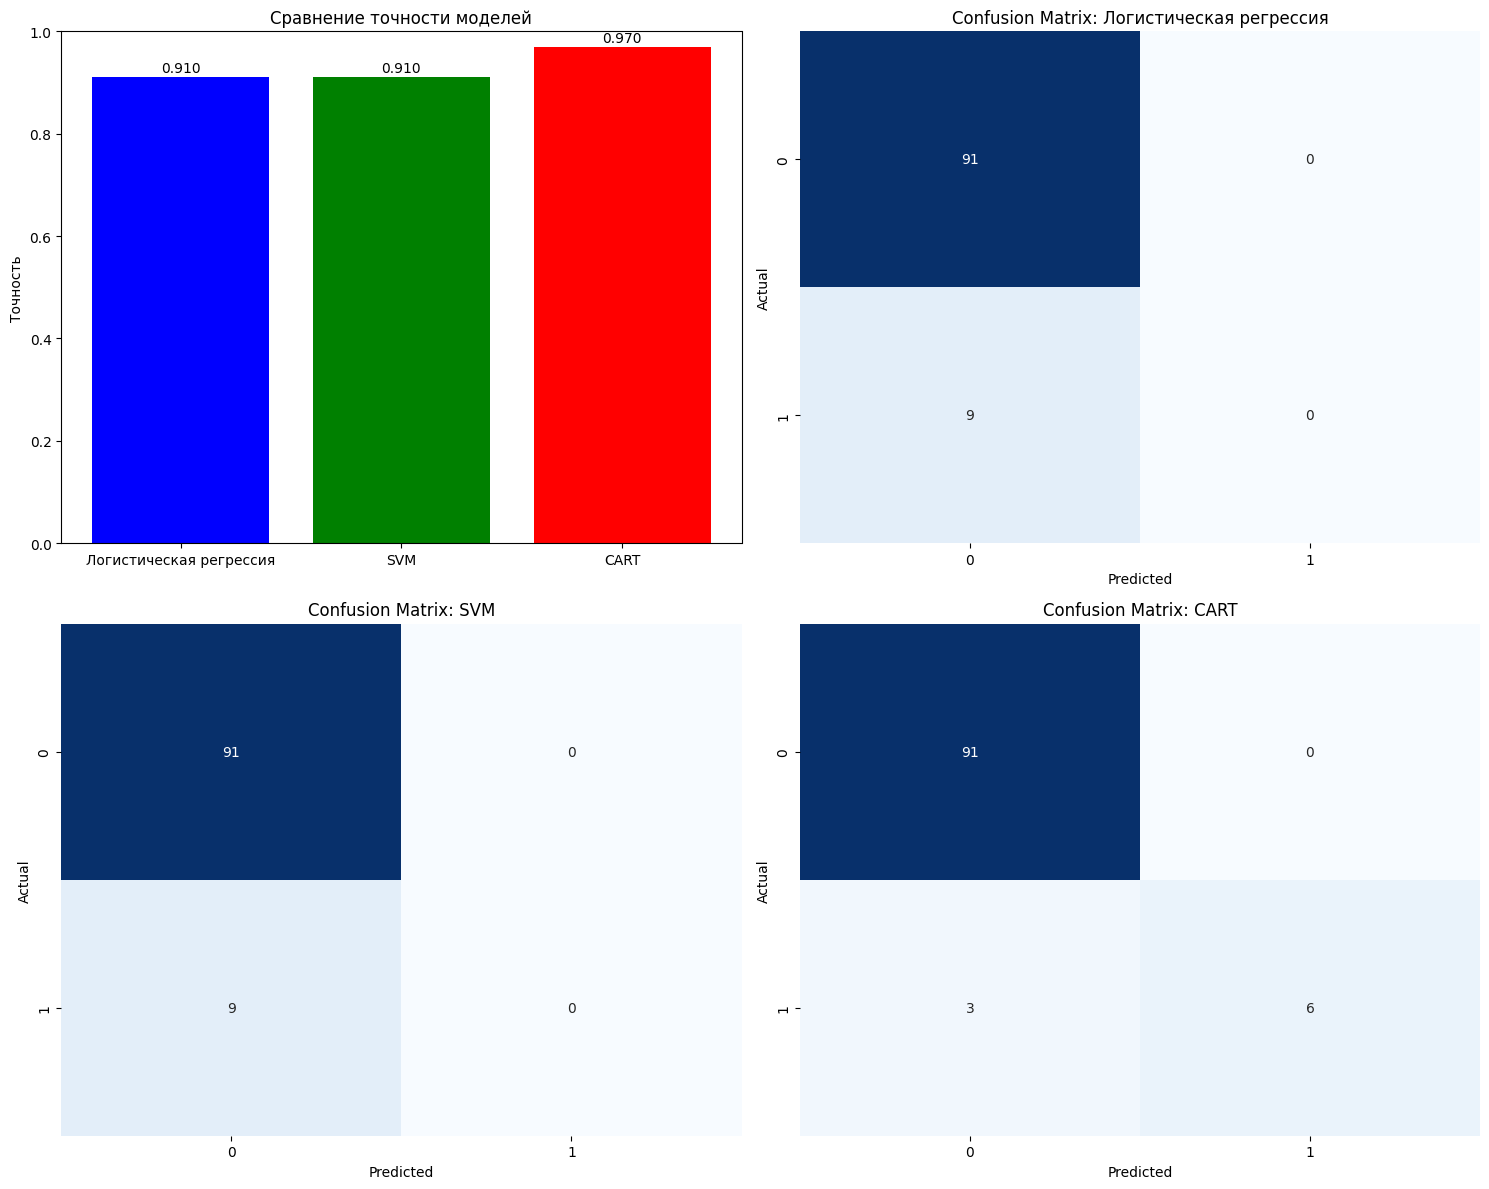

🏆 Лучшая модель: CART
   Точность: 0.9700

✅ Все модели обучены и протестированы!


In [22]:
# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Сравнение точности моделей
axes[0, 0].bar(results_df['Модель'], results_df['Точность'], color=['blue', 'green', 'red'])
axes[0, 0].set_title('Сравнение точности моделей')
axes[0, 0].set_ylabel('Точность')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate(results_df['Точность']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# 2-4. Confusion matrices
model_names = ['Логистическая регрессия', 'SVM', 'CART']
predictions_list = [lr_predictions, svm_predictions, cart_predictions]

for i, (name, pred) in enumerate(zip(model_names, predictions_list)):
    row = (i + 1) // 2
    col = (i + 1) % 2
    
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                ax=axes[row, col], cbar=False)
    axes[row, col].set_title(f'Confusion Matrix: {name}')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Лучшая модель
best_model_idx = results_df['Точность'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Модель']
best_accuracy = results_df.loc[best_model_idx, 'Точность']

print(f"🏆 Лучшая модель: {best_model_name}")
print(f"   Точность: {best_accuracy:.4f}")
print(f"\n✅ Все модели обучены и протестированы!")


## Детальная оценка качества моделей


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Расчет дополнительных метрик для всех моделей
models_data = {
    'Логистическая регрессия': lr_model,
    'SVM': svm_model, 
    'CART': cart_model
}

predictions_data = {
    'Логистическая регрессия': lr_predictions,
    'SVM': svm_predictions,
    'CART': cart_predictions
}

# Создаем таблицу с метриками
metrics_results = []

for name in models_data.keys():
    model = models_data[name]
    predictions = predictions_data[name]
    
    # Основные метрики
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    # ROC-AUC (нужны вероятности)
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    elif hasattr(model, 'decision_function'):
        y_scores = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_scores)
    else:
        roc_auc = None
    
    # Кросс-валидация
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    metrics_results.append({
        'Модель': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean': cv_mean,
        'CV Std': cv_std
    })

metrics_df = pd.DataFrame(metrics_results)
print("📊 Детальные метрики качества моделей:")
print("="*80)
print(metrics_df.round(4))


📊 Детальные метрики качества моделей:
                    Модель  Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
0  Логистическая регрессия      0.91        0.0  0.0000       0.0   0.6239   
1                      SVM      0.91        0.0  0.0000       0.0   0.8962   
2                     CART      0.97        1.0  0.6667       0.8   0.8333   

   CV Mean  CV Std  
0   0.9050  0.0061  
1   0.9050  0.0061  
2   0.9725  0.0094  


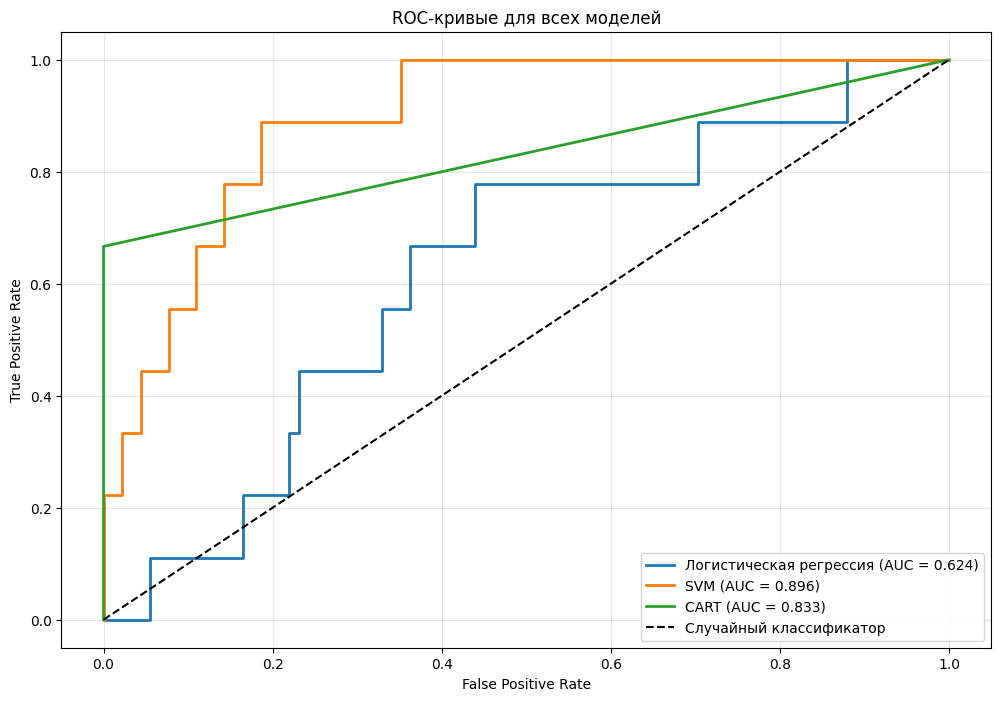

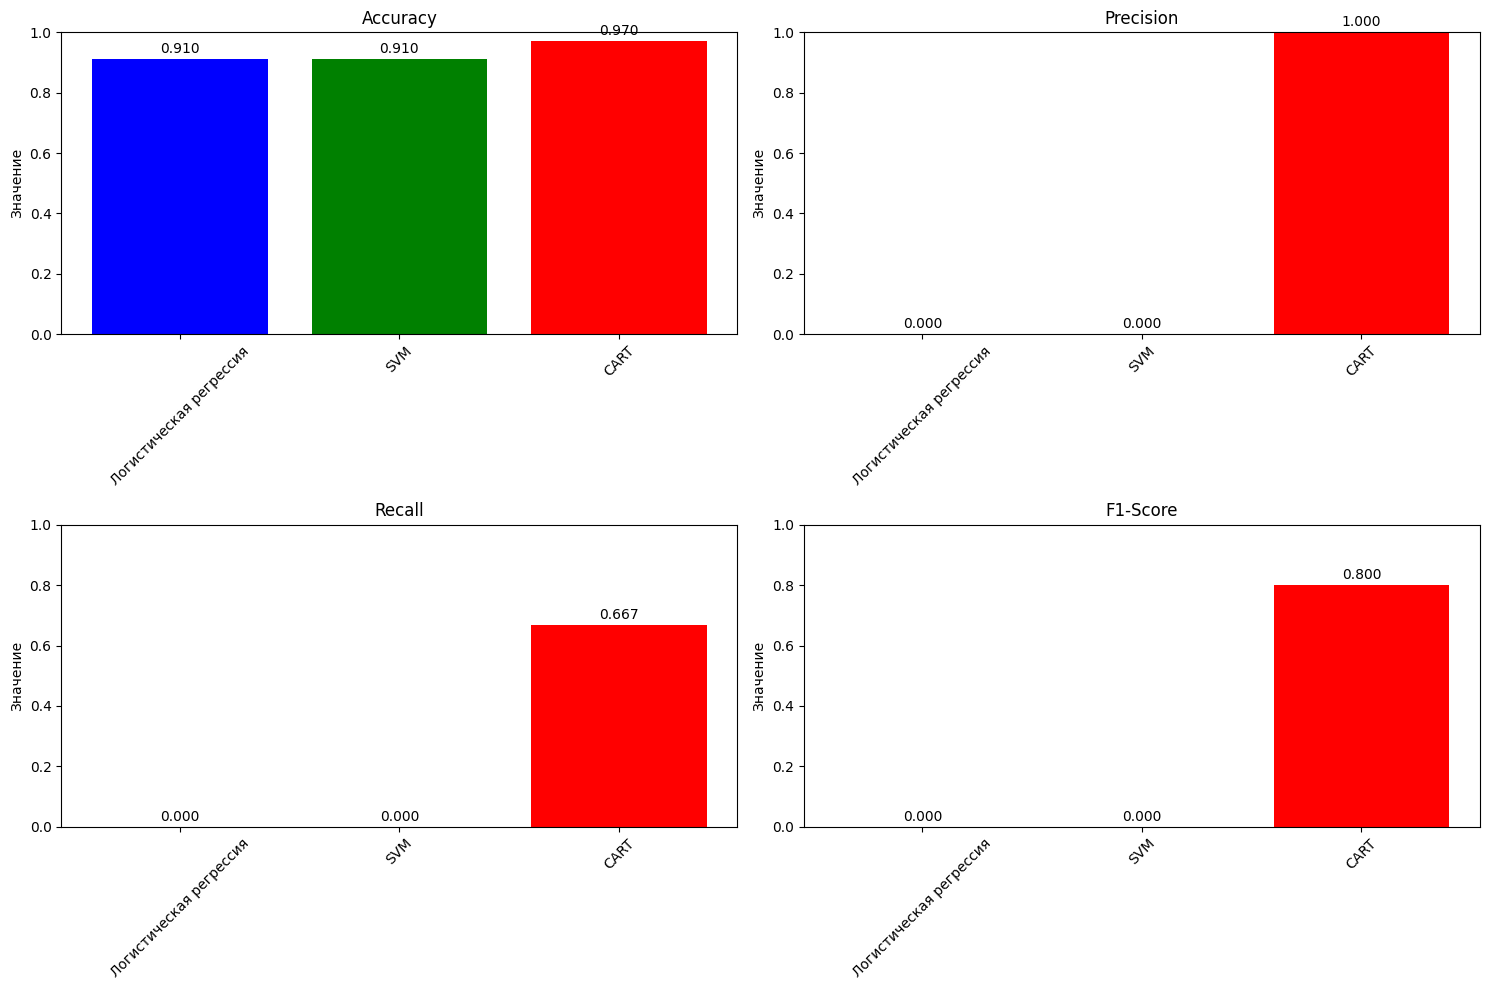

In [24]:
# ROC-кривые для моделей
plt.figure(figsize=(12, 8))

for name in models_data.keys():
    model = models_data[name]
    
    # Получаем вероятности или scores
    if hasattr(model, 'predict_proba'):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_scores = model.decision_function(X_test)
    else:
        continue
    
    # Строим ROC-кривую
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

# Диагональная линия (случайный классификатор)
plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для всех моделей')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Визуализация метрик
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Основные метрики
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = range(len(metrics_df))
width = 0.25

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    bars = ax.bar(x, metrics_df[metric], color=['blue', 'green', 'red'])
    ax.set_title(f'{metric}')
    ax.set_ylabel('Значение')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_df['Модель'], rotation=45)
    ax.set_ylim(0, 1)
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, metrics_df[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [25]:
# Анализ результатов и выводы
print("🔍 АНАЛИЗ КАЧЕСТВА МОДЕЛЕЙ:")
print("="*60)

# Лучшая модель по каждой метрике
best_models = {}
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    if metric in metrics_df.columns and metrics_df[metric].notna().any():
        best_idx = metrics_df[metric].idxmax()
        best_models[metric] = {
            'model': metrics_df.loc[best_idx, 'Модель'],
            'value': metrics_df.loc[best_idx, metric]
        }

print("\n🏆 Лучшие модели по метрикам:")
for metric, info in best_models.items():
    print(f"   {metric:12}: {info['model']:25} ({info['value']:.4f})")

# Общий рейтинг моделей
print(f"\n📊 Рейтинг моделей (по F1-Score):")
ranked_models = metrics_df.sort_values('F1-Score', ascending=False)
for i, row in ranked_models.iterrows():
    print(f"   {i+1}. {row['Модель']:25} F1={row['F1-Score']:.4f}")

# Стабильность моделей (по кросс-валидации)
print(f"\n📈 Стабильность моделей (кросс-валидация):")
stable_models = metrics_df.sort_values('CV Std')
for i, row in stable_models.iterrows():
    print(f"   {row['Модель']:25}: μ={row['CV Mean']:.4f} ± {row['CV Std']:.4f}")

print(f"\n✅ Оценка качества завершена!")
print(f"💡 Рекомендация: выберите модель на основе приоритетной метрики для вашей задачи")


🔍 АНАЛИЗ КАЧЕСТВА МОДЕЛЕЙ:

🏆 Лучшие модели по метрикам:
   Accuracy    : CART                      (0.9700)
   Precision   : CART                      (1.0000)
   Recall      : CART                      (0.6667)
   F1-Score    : CART                      (0.8000)
   ROC-AUC     : SVM                       (0.8962)

📊 Рейтинг моделей (по F1-Score):
   3. CART                      F1=0.8000
   1. Логистическая регрессия   F1=0.0000
   2. SVM                       F1=0.0000

📈 Стабильность моделей (кросс-валидация):
   Логистическая регрессия  : μ=0.9050 ± 0.0061
   SVM                      : μ=0.9050 ± 0.0061
   CART                     : μ=0.9725 ± 0.0094

✅ Оценка качества завершена!
💡 Рекомендация: выберите модель на основе приоритетной метрики для вашей задачи


# Лабораторная работа 4: Очистка и предобработка данных

Анализ и очистка датасета healthy_meal_plans.csv от пропусков и выбросов с последующим масштабированием.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('healthy_meal_plans.csv')

print("Базовая информация о датасете:")
print(f"Размер: {df.shape}")
print(f"Столбцы: {list(df.columns)}")
print(f"\nПервые 5 строк:")
df.head()


Базовая информация о датасете:
Размер: (500, 14)
Столбцы: ['meal_name', 'num_ingredients', 'calories', 'prep_time', 'protein', 'fat', 'carbs', 'vegan', 'vegetarian', 'keto', 'paleo', 'gluten_free', 'mediterranean', 'is_healthy']

Первые 5 строк:


,meal_name,num_ingredients,calories,prep_time,protein,fat,carbs,vegan,vegetarian,keto,paleo,gluten_free,mediterranean,is_healthy
0,Gluten-Free Pasta,0.272727,0.490909,0.84,0.783679,0.597907,0.444572,0,0,0,0,1,0,1
1,Grilled Salmon,0.909091,0.158182,0.70,0.143588,0.652082,0.050609,0,0,1,1,1,1,0
2,Lentil Soup,0.454545,0.700000,0.40,0.620637,0.612748,0.000688,0,1,0,0,0,0,0
3,Chickpea Stew,0.909091,0.105455,0.82,0.046893,0.975761,0.229026,1,1,0,0,0,0,0
4,Turkey Lettuce Wraps,0.181818,0.441818,0.04,0.864340,0.681575,0.449293,0,0,1,1,1,1,0


In [27]:
# Анализ пропусков
print("Пропуски в данных:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

if missing_data.sum() == 0:
    print("Пропусков в данных нет")
else:
    print(f"Найдено {missing_data.sum()} пропусков")

# Информация о типах данных
print(f"\nТипы данных:")
print(df.dtypes)
print(f"\nОписательная статистика:")
df.describe()


Пропуски в данных:
Series([], dtype: int64)
Пропусков в данных нет

Типы данных:
meal_name           object
num_ingredients    float64
calories           float64
prep_time          float64
protein            float64
fat                float64
carbs              float64
vegan                int64
vegetarian           int64
keto                 int64
paleo                int64
gluten_free          int64
mediterranean        int64
is_healthy           int64
dtype: object

Описательная статистика:


,num_ingredients,calories,prep_time,protein,fat,carbs,vegan,vegetarian,keto,paleo,gluten_free,mediterranean,is_healthy
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.489818,0.504149,0.486480,0.505704,0.506822,0.507081,0.334000,0.574000,0.366000,0.388000,0.528000,0.302000,0.094000
std,0.305054,0.290267,0.293234,0.291046,0.282906,0.292257,0.472112,0.494989,0.482192,0.487783,0.499715,0.459585,0.292121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.231818,0.220000,0.236392,0.257945,0.251489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.454545,0.509091,0.490000,0.521935,0.516733,0.510196,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.727273,0.751364,0.740000,0.764155,0.751306,0.746904,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# Анализ выбросов с помощью IQR метода
numeric_columns = df.select_dtypes(include=[np.number]).columns

print("Анализ выбросов (IQR метод):")
outliers_info = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = len(outliers)
    outliers_info[col] = outliers_count
    
    print(f"{col:20}: {outliers_count:3d} выбросов ({outliers_count/len(df)*100:.1f}%)")

total_outliers = sum(outliers_info.values())
print(f"\nВсего выбросов найдено: {total_outliers}")


Анализ выбросов (IQR метод):
num_ingredients     :   0 выбросов (0.0%)
calories            :   0 выбросов (0.0%)
prep_time           :   0 выбросов (0.0%)
protein             :   0 выбросов (0.0%)
fat                 :   0 выбросов (0.0%)
carbs               :   0 выбросов (0.0%)
vegan               :   0 выбросов (0.0%)
vegetarian          :   0 выбросов (0.0%)
keto                :   0 выбросов (0.0%)
paleo               :   0 выбросов (0.0%)
gluten_free         :   0 выбросов (0.0%)
mediterranean       :   0 выбросов (0.0%)
is_healthy          :  47 выбросов (9.4%)

Всего выбросов найдено: 47


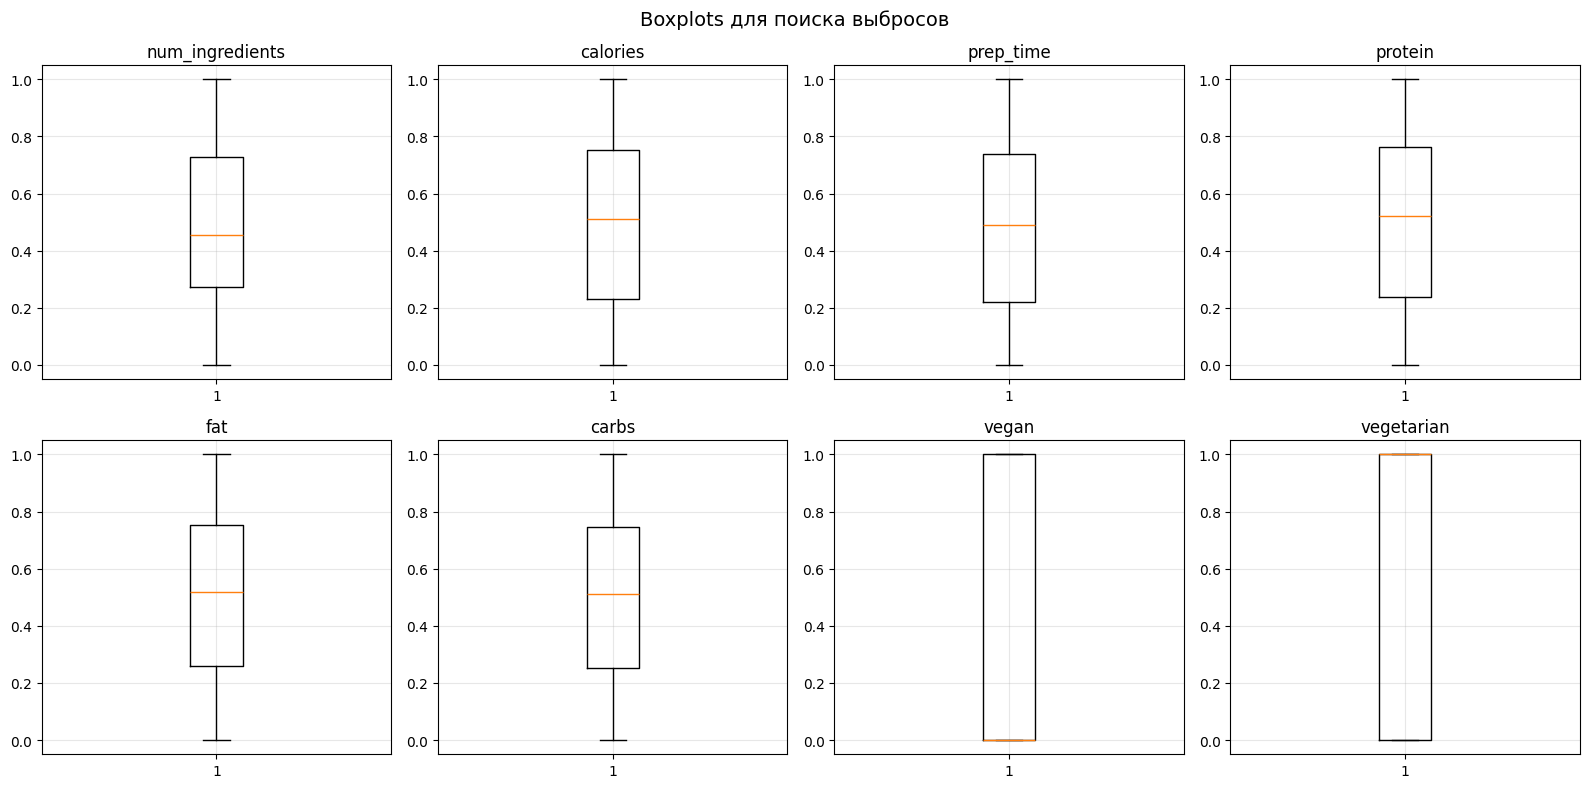

Удаление выбросов...
Размер до очистки: (500, 14)
Размер после очистки: (453, 14)
Удалено строк: 47


In [29]:
# Визуализация выбросов
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].boxplot(df[col])
        axes[i].set_title(f'{col}')
        axes[i].grid(True, alpha=0.3)

plt.suptitle('Boxplots для поиска выбросов', fontsize=14)
plt.tight_layout()
plt.show()

# Удаление выбросов
print("Удаление выбросов...")
df_clean = df.copy()

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Размер до очистки: {df.shape}")
print(f"Размер после очистки: {df_clean.shape}")
print(f"Удалено строк: {df.shape[0] - df_clean.shape[0]}")


In [30]:
# Анализ необходимости масштабирования
print("Анализ масштабов признаков:")
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    min_val = df_clean[col].min()
    max_val = df_clean[col].max()
    range_val = max_val - min_val
    std_val = df_clean[col].std()
    print(f"{col:20}: [{min_val:8.3f}, {max_val:8.3f}] | Диапазон: {range_val:8.3f} | σ: {std_val:6.3f}")

# Оценка необходимости масштабирования
ranges = [df_clean[col].max() - df_clean[col].min() for col in numeric_cols]
stds = [df_clean[col].std() for col in numeric_cols]

range_ratio = max(ranges) / min(ranges) if min(ranges) != 0 else float('inf')
std_ratio = max(stds) / min(stds) if min(stds) != 0 else float('inf')

print(f"\nОтношение макс/мин диапазонов: {range_ratio:.2f}")
print(f"Отношение макс/мин стандартных отклонений: {std_ratio:.2f}")

if range_ratio > 10 or std_ratio > 10:
    print("РЕКОМЕНДУЕТСЯ масштабирование")
    scaling_needed = True
else:
    print("Масштабирование желательно")
    scaling_needed = True


Анализ масштабов признаков:
num_ingredients     : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.312
calories            : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.301
prep_time           : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.295
protein             : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.301
fat                 : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.285
carbs               : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.300
vegan               : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.471
vegetarian          : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.495
keto                : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.483
paleo               : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.488
gluten_free         : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.500
mediterranean       : [   0.000,    1.000] | Диапазон:    1.000 | σ:  0.464
is_healthy          : [   0.000,    0.000] | Диапазон:    0.

In [31]:
# Применение масштабирования
# Разделяем на числовые и категориальные признаки
numeric_data = df_clean[numeric_cols]
categorical_data = df_clean.select_dtypes(exclude=[np.number])

# StandardScaler
scaler_standard = StandardScaler()
numeric_standard = pd.DataFrame(
    scaler_standard.fit_transform(numeric_data),
    columns=numeric_cols,
    index=df_clean.index
)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
numeric_normalized = pd.DataFrame(
    scaler_minmax.fit_transform(numeric_data),
    columns=numeric_cols,
    index=df_clean.index
)

# Объединяем с категориальными данными
df_standardized = pd.concat([categorical_data, numeric_standard], axis=1)
df_normalized = pd.concat([categorical_data, numeric_normalized], axis=1)

print("Масштабирование выполнено!")
print(f"Исходные данные: {df_clean.shape}")
print(f"Стандартизированные: {df_standardized.shape}")
print(f"Нормализованные: {df_normalized.shape}")


Масштабирование выполнено!
Исходные данные: (453, 14)
Стандартизированные: (453, 14)
Нормализованные: (453, 14)


In [32]:
print(f"\nИтоговая статистика:")
print(f"Исходный размер: {df.shape[0]} строк")
print(f"После очистки: {df_clean.shape[0]} строк")
print(f"Удалено: {df.shape[0] - df_clean.shape[0]} строк ({(df.shape[0] - df_clean.shape[0])/df.shape[0]*100:.1f}%)")
print(f"Числовых признаков: {len(numeric_cols)}")
print(f"Категориальных признаков: {len(categorical_data.columns) if not categorical_data.empty else 0}")
print("Предобработка данных завершена!")



Итоговая статистика:
Исходный размер: 500 строк
После очистки: 453 строк
Удалено: 47 строк (9.4%)
Числовых признаков: 13
Категориальных признаков: 1
Предобработка данных завершена!
